# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [1]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
from zipfile import ZipFile 
# specify the file name 
file_name = "/content/archive.zip"
  
# open the file in read mode 
with ZipFile(file_name, 'r') as zip: 
    # print the file's contents
    zip.printdir() 
    # unzip the file 
    print('Extracting all the files now...') 
    zip.extractall(path="/content/") 
    print('Done!') 
# now we have the data in a csv file in the data folder

File Name                                             Modified             Size
housing.csv                                    2019-09-22 01:36:12      1423529
Extracting all the files now...
Done!


In [2]:
import pandas as pd
housing = pd.read_csv("/content/housing.csv")

housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# View the counts of each value in the "ocean_proximity" feature
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

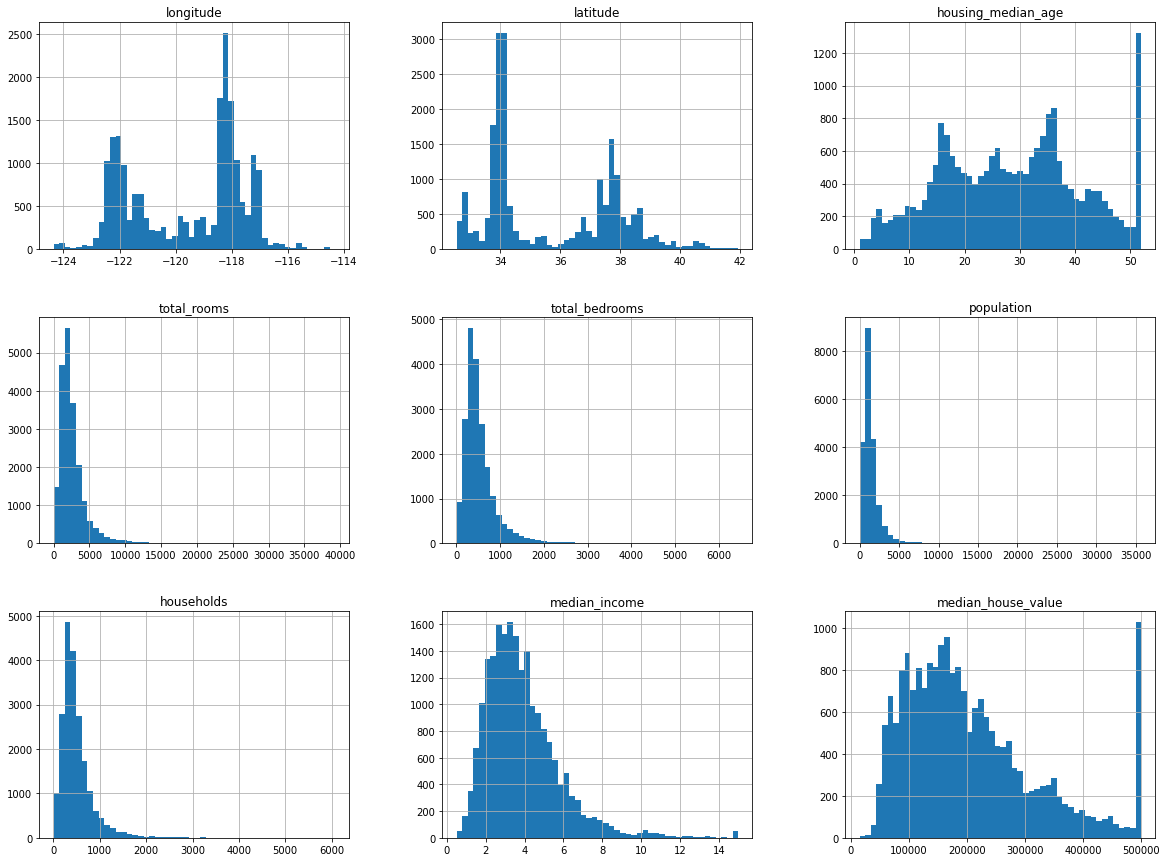

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

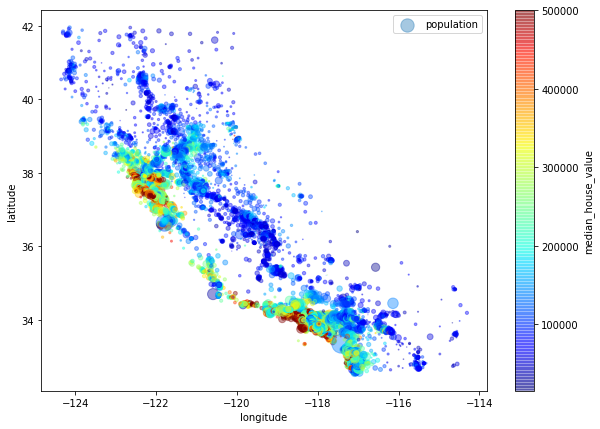

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [8]:
# Let's look at how much each feature correlates to the house value 
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc186dab3c8>,
      dtype=object)

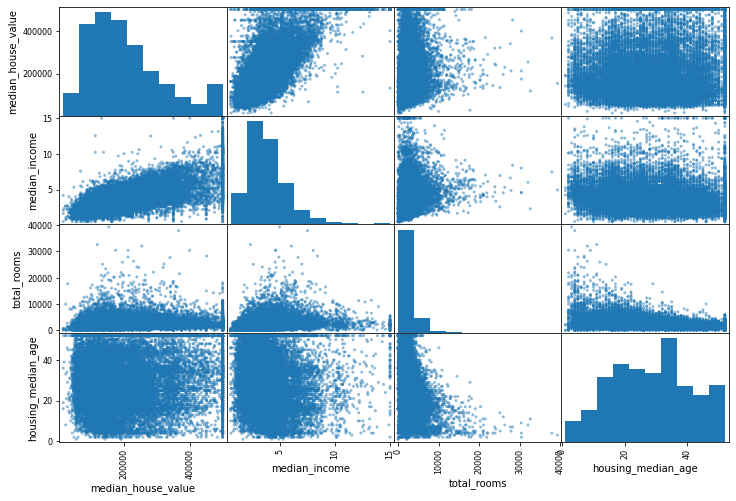

In [9]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_num = housing.drop("ocean_proximity", axis=1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [12]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [13]:
housing_prepared.shape

(20640, 17)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [14]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

class cluster:
  def __init__(self, centroid):
    self.centroid = centroid
    self.member_indices = []

  def __str__(self):
    return str(self.centroid)

  def __repr__(self):
    return str(self.centroid)

  def add_member(self, x):
    self.member_indices.append(x)
  
  def remove_member(self, x):
    try:
      self.member_indices.remove(x)
    except:
      pass

  def get_members(self):
    return self.member_indices
  
  def get_centroid(self):
    return self.centroid

  def member_exists(self, x):
    return (x in self.member_indices)
    
  def set_centroid(self, x):
    self.centroid = x

  def add_to_centroid(self, x):
    self.centroid += x;

  def average_centroid(self):
    self.centroid /= len(self.member_indices)

def get_minkovski(X, Y, p):
  if p == np.inf:
    max = 0
    for i in range(len(X)):
      max = np.maximum(max, np.absolute(X[i] - Y[i]))
    return max
  else:
    sum = 0
    for i in range(len(X)):
      sum += np.power(np.absolute(X[i] - Y[i]), p)
    return np.power(sum, 1/p)

In [53]:
def k_means(k, data, distance_measure):
  m,n = data.shape
  clusters = []
  max_values = np.amax(data, axis=0)
  min_values = np.amin(data, axis=0)
  finished = False

  #initalize the distance measure
  if distance_measure == "Manhattan":
    distance_measure = 1
  elif distance_measure == "Euclidean":
    distance_measure = 2
  else:
    distance_measure = np.inf

  #Function to initialize centroids with random values
  def initialize_centroids():
    for c in range(k):
      clusters.append(cluster(np.zeros(n)))
    for i in range(m):
      temp = np.random.randint(k)
      clusters[temp].add_member(i)


    """
    for c1 in range(k):
      temp = np.zeros(n)
      for f in range(n):
        temp[f] = np.random.randint(low=min_values[f], high=max_values[f])
      clusters.append(cluster(temp))
    """

  #Function to assign the membership for each object in data
  def assign_memberships():
    amount_unchanged = 0

    for x in range(m):
      min_distance = np.inf
      closest = 0
      #Find the closest centroid to this object
      for c2 in range(k):
        distance = get_minkovski(data[x], clusters[c2].get_centroid(), distance_measure)
        if distance < min_distance:
          min_distance = distance
          closest = c2

      #Assign membership to this object
      if clusters[closest].member_exists(x):
        amount_unchanged+=1

      for c3 in clusters:
        try:
          c3.remove_member(x)
        except:
          pass

      clusters[closest].add_member(x)
      

    if amount_unchanged == m:
      return True
    return False


  #Function to re-estimate the centroid for each cluster
  def estimate_centroids():
    for c4 in clusters:
      members = c4.get_members()
      if len(members) != 0:
        c4.set_centroid(np.zeros(n))
        for index in members:
          c4.add_to_centroid(data[index])
        c4.average_centroid()

  initialize_centroids()
  estimate_centroids()
  while not (finished):
    finished = assign_memberships()
    estimate_centroids()
  return clusters

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [39]:
clusters_euclidean = np.array(k_means(2, housing_prepared, "Euclidean"))
clusters_manhattan = np.array(k_means(2, housing_prepared, "Manhattan"))
clusters_sup = np.array(k_means(2, housing_prepared, "Sup"))

In [40]:
def get_SSE(clusters, data):
  SSE = 0
  for cluster in clusters:
    centroid = cluster.get_centroid()
    for member in cluster.get_members():
      SSE += get_minkovski(data[member], centroid, 2)
  return SSE

def get_SD(cluster, data):
  m,n = data.shape
  SD = np.zeros(n)
  centroid = cluster.get_centroid()
  SD = 0
  for member in cluster.get_members():
    SD += np.power(np.abs(data[member] - centroid), 2)
  SD /= m
  SD = np.sqrt(SD)
  return SD

def get_cluster_info(my_centroids):
  print("SSE: " + str(get_SSE(my_centroids, housing_prepared)))
  print()
  for i in range(len(my_centroids)):
    print("The standard deviation for each attribute in cluster #" + str(i+1) + ":")
    print(get_SD(my_centroids[i], housing_prepared))
    print()
    print("This clusters centroid means are:")
    print(my_centroids[i])
    print()
    print("This cluster has " + str(len(my_centroids[i].get_members())) + " members" )
    print()

print("Statistics for k=2 and Manhattan")
get_cluster_info(clusters_manhattan)
print()
print()
print()

print("Statistics for k=2 and Euclidean")
get_cluster_info(clusters_euclidean)
print()
print()
print()

print("Statistics for k=2 and Sup")
get_cluster_info(clusters_sup)
print()
print()
print()

Statistics for k=2 and Manhattan
SSE: 57643.164917349975

The standard deviation for each attribute in cluster #1:
[0.34277373 0.32057202 0.25397045 0.57114391 0.52253704 0.56526438
 0.5139387  0.32431613 0.32318912 0.28411275 0.02266303 0.34080708
 0.17366816 0.16285134 0.         0.09590098 0.11059321]

This clusters centroid means are:
[ 0.18422077 -0.17486426 -0.87354583  1.88701553  1.95984382  1.80605903
  1.9622548   0.15986991  0.14574888  0.03927779 -0.02537611 -0.0064191
  0.47775551  0.3250501   0.          0.08296593  0.11422846]

This cluster has 2495 members

The standard deviation for each attribute in cluster #2:
[0.93693099 0.94500215 0.91135754 0.42914866 0.44587666 0.48162296
 0.45433216 0.94408934 0.94478984 0.95868024 0.99969888 0.94013024
 0.46516567 0.43603465 0.01556218 0.29888981 0.31612506]

This clusters centroid means are:
[-2.53309904e-02  2.40444387e-02  1.20115561e-01 -2.59471135e-01
 -2.69485275e-01 -2.48339338e-01 -2.69816794e-01 -2.19826636e-02
 -2.004

Based off of this, I will use Euclidean distance as my distance metric going forward.

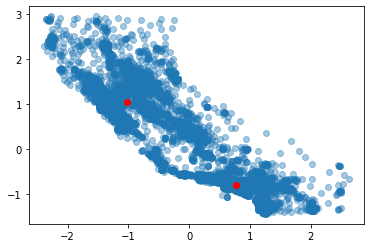

In [41]:
plt.scatter(housing_prepared[:,0], housing_prepared[:,1], alpha=.4)
for centroid in clusters_euclidean:
  plt.scatter(centroid.get_centroid()[0], centroid.get_centroid()[1], c="red")

In the map above, the two cluster means are shown in red. Geographically, these two clusters appear fairly spread out. Based on California's population density distribution, this makes sense. California's most densely populated areas are near San Francisco and Los Angeles. San Francisco is located on the coast, a little bit below the top red dot. On the other hand, Los Angeles and San Diego are located in souther California close to the lower red dot. It would make sense that the clusters appear close to the largest cities in California since this is where a majority of the population resides.


In [42]:
clusters_euclidean3 = np.array(k_means(3, housing_prepared, "Euclidean"))
print("Statistics for k=3 and Euclidean")
get_cluster_info(clusters_euclidean3)

Statistics for k=3 and Euclidean
SSE: 50805.538101776285

The standard deviation for each attribute in cluster #1:
[0.26468478 0.18775487 0.66012997 0.35619407 0.38063151 0.41182934
 0.38162289 0.73003763 0.70008327 0.48108022 0.09873294 0.79096982
 0.34114795 0.28035529 0.01556065 0.         0.26156567]

This clusters centroid means are:
[ 7.84472776e-01 -8.15181016e-01  9.53334775e-02 -2.16908028e-01
 -1.96284834e-01 -1.38457038e-01 -1.90746437e-01  2.26926635e-02
  7.81325484e-02 -9.61159127e-02  5.08968805e-04  1.04698842e-01
  6.52219075e-01  1.88857413e-01  4.72143532e-04  0.00000000e+00
  1.58451369e-01]

This cluster has 10590 members

The standard deviation for each attribute in cluster #2:
[0.27978587 0.2596145  0.20469631 0.51097705 0.46221988 0.51274737
 0.45426868 0.27046447 0.2706039  0.20245681 0.01863397 0.27827408
 0.14304086 0.13705301 0.         0.07837511 0.08676294]

This clusters centroid means are:
[ 0.20394345 -0.17990185 -0.95648471  2.36618793  2.42032725  2.2

In [44]:
clusters_euclidean4 = np.array(k_means(4, housing_prepared, "Euclidean"))
print("Statistics for k=4 and Euclidean")
get_cluster_info(clusters_euclidean4)

Statistics for k=4 and Euclidean
SSE: 47795.33515682567

The standard deviation for each attribute in cluster #1:
[0.29898662 0.2899217  0.62101524 0.29740001 0.32407351 0.31987019
 0.33406952 0.37006956 0.46784188 0.35396848 0.43175599 0.43387408
 0.20944576 0.29645217 0.         0.25662777 0.1644196 ]

This clusters centroid means are:
[-1.02166464  1.10096427  0.08767359 -0.23657968 -0.23284893 -0.26992239
 -0.23723971 -0.32194445 -0.3709253  -0.0350356  -0.01420915 -0.02532955
  0.14582474  0.52139221  0.          0.24900261  0.08378044]

This cluster has 7269 members

The standard deviation for each attribute in cluster #2:
[0.24285712 0.18458785 0.57441761 0.30086797 0.36421166 0.39183905
 0.3648233  0.36073152 0.42229379 0.28372757 0.09393175 0.74060285
 0.3093449  0.26377523 0.0155597  0.00696016 0.2324299 ]

This clusters centroid means are:
[ 8.01905202e-01 -8.08455785e-01  1.40634688e-01 -2.72024046e-01
 -1.59924619e-01 -8.80256945e-02 -1.57099693e-01 -3.73470003e-01
 -2.769

In [45]:
clusters_euclidean5 = np.array(k_means(5, housing_prepared, "Euclidean"))
print("Statistics for k=5 and Euclidean")
get_cluster_info(clusters_euclidean5)

Statistics for k=5 and Euclidean
SSE: 45925.801095961615

The standard deviation for each attribute in cluster #1:
[0.25639637 0.23595316 0.18098057 0.48455189 0.43273604 0.48696631
 0.42463192 0.21358011 0.22085629 0.1631372  0.01687861 0.22737586
 0.12932122 0.12533155 0.         0.07289355 0.0760905 ]

This clusters centroid means are:
[ 0.20840606 -0.1765926  -0.9992363   2.60003732  2.671049    2.47358729
  2.66960309  0.13201329  0.05443219  0.04085252 -0.02574239 -0.0568699
  0.45121951  0.36800574  0.          0.08608321  0.09469154]

This cluster has 1394 members

The standard deviation for each attribute in cluster #2:
[0.23129425 0.17205221 0.5605582  0.29432431 0.36059258 0.38951197
 0.36136182 0.35302693 0.41668177 0.27721148 0.09361023 0.72760579
 0.30367302 0.25570159 0.01555957 0.         0.23011975]

This clusters centroid means are:
[ 8.14776766e-01 -8.21769287e-01  1.69596256e-01 -2.81037354e-01
 -1.63588824e-01 -8.94036598e-02 -1.60163999e-01 -3.79549539e-01
 -2.678

In [47]:
clusters_euclidean6 = np.array(k_means(6, housing_prepared, "Euclidean"))
print("Statistics for k=6 and Euclidean")
get_cluster_info(clusters_euclidean6)

Statistics for k=6 and Euclidean
SSE: 44514.90881030675

The standard deviation for each attribute in cluster #1:
[0.3243161  0.29609279 0.24269642 0.27972835 0.26359241 0.27927859
 0.25249706 0.25390828 0.28363945 0.21165779 0.058671   0.31958233
 0.16910552 0.15753351 0.         0.08929796 0.1088424 ]

This clusters centroid means are:
[ 0.22191916 -0.22622741 -0.79247716  1.33819752  1.49974681  1.36512497
  1.50889082 -0.00722194  0.03718263 -0.06646728 -0.02233236  0.09586652
  0.48941575  0.31795089  0.          0.07535986  0.1172735 ]

This cluster has 2362 members

The standard deviation for each attribute in cluster #2:
[0.26470501 0.28325246 0.33870169 0.21642467 0.22049005 0.2364999
 0.22728563 0.29149258 0.23481434 0.36638774 0.92366264 0.28084122
 0.1511074  0.186862   0.         0.10062063 0.08431631]

This clusters centroid means are:
[-0.79735414  1.11523492 -0.52585868 -0.22623203 -0.25967759 -0.26492016
 -0.27890909 -0.39125557 -0.72154335  0.0976639   0.02525106 -0.1

In [48]:
clusters_euclidean7 = np.array(k_means(7, housing_prepared, "Euclidean"))
print("Statistics for k=7 and Euclidean")
get_cluster_info(clusters_euclidean7)

Statistics for k=7 and Euclidean
SSE: 43135.34042389249

The standard deviation for each attribute in cluster #1:
[0.10604998 0.12089653 0.26804301 0.16468794 0.19340058 0.17946355
 0.19827468 0.25315798 0.35713881 0.14992741 0.99335882 0.29077821
 0.14368437 0.13199277 0.         0.19116911 0.14106683]

This clusters centroid means are:
[-1.29038971  1.02275529  1.04294947 -0.33779531 -0.309651   -0.38024491
 -0.3002427  -0.17297081  0.18289148 -0.16038071  0.04209289  0.07066653
  0.16936283  0.1376692   0.          0.53119842  0.16176956]

This cluster has 3029 members

The standard deviation for each attribute in cluster #2:
[0.10115213 0.09546117 0.06054569 0.2507266  0.21628548 0.29544903
 0.21378347 0.08649893 0.08803465 0.06423199 0.00691066 0.0810627
 0.05149419 0.05165215 0.         0.02759869 0.03037928]

This clusters centroid means are:
[ 0.31794893 -0.25023264 -1.37030869  5.80638608  5.50369215  5.38340158
  5.50555136  0.41069183  0.14688155  0.22808323 -0.01578932 -0.3

In [50]:
clusters_euclidean8 = np.array(k_means(8, housing_prepared, "Euclidean"))
print("Statistics for k=8 and Euclidean")
get_cluster_info(clusters_euclidean8)

Statistics for k=8 and Euclidean
SSE: 41825.261374383976

The standard deviation for each attribute in cluster #1:
[0.13344296 0.12438033 0.09533496 0.31961061 0.27350396 0.35133187
 0.27290092 0.11835546 0.12415642 0.08600927 0.0090192  0.12800647
 0.0690073  0.06906129 0.         0.03611    0.03831338]

This clusters centroid means are:
[ 0.3157787  -0.24457248 -1.23519122  4.62544116  4.52260326  4.27107355
  4.4878001   0.31288124  0.11665886  0.16869593 -0.02235002 -0.19385941
  0.42183623  0.42431762  0.          0.0719603   0.08188586]

This cluster has 403 members

The standard deviation for each attribute in cluster #2:
[0.27595692 0.2475449  0.28812145 0.20340136 0.15072319 0.1494513
 0.15060631 0.34292158 0.22356465 0.75424486 0.03169941 0.10771864
 0.14031945 0.09046763 0.         0.08941575 0.10773831]

This clusters centroid means are:
[ 0.00977682 -0.17392288 -0.16283295  0.1016693  -0.29227548 -0.30188079
 -0.3015681   2.1703706   1.83032175  1.09199422 -0.01955661 -1.0

In [51]:
clusters_euclidean9 = np.array(k_means(9, housing_prepared, "Euclidean"))
print("Statistics for k=9 and Euclidean")
get_cluster_info(clusters_euclidean9)

Statistics for k=9 and Euclidean
SSE: 41025.735217491514

The standard deviation for each attribute in cluster #1:
[0.14831448 0.09891601 0.29479031 0.13388176 0.14580367 0.16345045
 0.15122616 0.2628438  0.34186461 0.15800272 0.04907939 0.23635947
 0.20626594 0.16925059 0.01391463 0.         0.14911345]

This clusters centroid means are:
[ 0.76614733 -0.80294671  0.66358444 -0.50344157 -0.50512685 -0.42065396
 -0.49174807 -0.21458379 -0.12662998 -0.18789312  0.0082578   0.02336216
  0.71047084  0.16608105  0.00093699  0.          0.12251113]

This cluster has 4269 members

The standard deviation for each attribute in cluster #2:
[0.24327495 0.26197325 0.35065613 0.13798032 0.15148648 0.15987883
 0.15422874 0.22334858 0.16001073 0.34332698 0.04604465 0.24506123
 0.09282259 0.13152696 0.         0.07815224 0.06338408]

This clusters centroid means are:
[-0.72086098  1.11783587 -0.18164282 -0.4500018  -0.45942339 -0.47009148
 -0.49088284 -0.61334524 -0.90244236  0.05138932 -0.01419263 -0

In [52]:
clusters_euclidean10 = np.array(k_means(10, housing_prepared, "Euclidean"))
print("Statistics for k=10 and Euclidean")
get_cluster_info(clusters_euclidean10)

Statistics for k=10 and Euclidean
SSE: 40484.925559339834

The standard deviation for each attribute in cluster #1:
[0.10563186 0.07896148 0.2099293  0.22726377 0.23278311 0.24358786
 0.22202583 0.20141084 0.23644542 0.19028502 0.05775812 0.22306191
 0.14761701 0.13594937 0.         0.         0.10294721]

This clusters centroid means are:
[ 0.86955639 -0.8205485  -0.77236119  1.10062131  1.26278777  1.16414803
  1.24860253 -0.06373782 -0.05325648 -0.05884277 -0.01673995  0.06791156
  0.56502732  0.29617486  0.          0.          0.13879781]

This cluster has 1830 members

The standard deviation for each attribute in cluster #2:
[0.12813452 0.08492241 0.35950579 0.16911505 0.15481164 0.15485291
 0.15878404 0.22538118 0.33064423 0.16949052 0.02134057 0.18112889
 0.16744294 0.11473106 0.00984056 0.         0.13871318]

This clusters centroid means are:
[ 7.40401960e-01 -8.35514406e-01 -2.20180798e-03 -1.26584485e-01
 -2.95893138e-01 -3.01553251e-01 -2.70759837e-01  7.43438246e-01
  8.3

It is clear from this data that as the number of clusters increases, the inertia goes down. This was as expected.

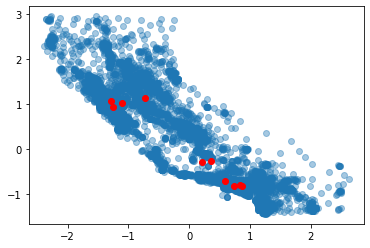

In [54]:
plt.scatter(housing_prepared[:,0], housing_prepared[:,1], alpha=.4)
for centroid in clusters_euclidean10:
  plt.scatter(centroid.get_centroid()[0], centroid.get_centroid()[1], c="red")

From plotting the 10 clusters, it appears that the clusters were all close to either Los Angeles, or to the Silicon Valley area.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



The California Housing Crisis is a result of many factors. To begin with, there is limited land in California but high demand for it. As a result of areas like Silicon Valley, there has been lots of economic growth in California. This has resulted in large amounts of new jobs being available. As a result, people have been moving to California, which causes high demand for housing. Like any other state, the population is centered around the major cities and along the coast. Most large companies in California are located in places like San Francisco, Los Angeles, the Silicon Valley area, and so on. All of their employees need to live relatively close to their offices. This means that not only is there high demand for housing in California, but much of it is concentrated around these already densely populated areas. An insufficient amount of new housing construction makes this an even bigger problem. High demand and low supply has led to this housing crisis. 

In my opinion, the best way to solve this would be to try and shift some of the population North and away from the coast. If there was an area like Silicon Valley in northern California, this might draw people away from the Coast and away from the south. This basically equates to "adding more clusters" to California. The current clusters are too close together, and too few. A greater number of clusters would help to spread out the population, making housing more affordable and more available.